In [1]:
import json
import requests
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
plt.style.use("ggplot")

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [2]:
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=2000')
df = pd.DataFrame(json.loads(res.content)['Data'])
df.drop(['conversionType'], 1, inplace=True)
df.drop(['conversionSymbol'], 1, inplace=True)
df['time'] = pd.to_datetime(df['time'], unit='s')
df = df.set_index("time")[['close']].tail(1000)
df = df.set_index(pd.to_datetime(df.index))


scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

In [3]:
def visualize_training_results(results):
    """
    Plots the loss and accuracy for the training and testing data
    """
    history = results.history
    plt.figure(figsize=(12,4))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure(figsize=(12,4))
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
    

In [4]:
def split_sequence(seq, n_steps_in, n_steps_out):
    """
    Splits the univariate time sequence
    """
    X, y = [], []
    
    for i in range(len(seq)):
        end = i + n_steps_in
        out_end = end + n_steps_out
        
        if out_end > len(seq):
            break
        
        seq_x, seq_y = seq[i:end], seq[end:out_end]
        
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

In [5]:
def layer_maker(n_layers, n_nodes, activation, drop=None, d_rate=.5):
    """
    Create a specified number of hidden layers for an RNN
    Optional: Adds regularization option, dropout layer to prevent potential overfitting if necessary
    """
    
    # Creating the specified number of hidden layers with the specified number of nodes
    for x in range(1,n_layers+1):
        model.add(LSTM(n_nodes, activation=activation, return_sequences=True))

In [6]:
# How many periods looking back to train
n_per_in  = 30

# How many periods ahead to predict
n_per_out = 10

# Features (in this case it's 1 because there is only one feature: price)
n_features = 1

# Splitting the data into appropriate sequences
X, y = split_sequence(list(df.close), n_per_in, n_per_out)

# Reshaping the X variable from 2D to 3D
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [7]:
# Instantiating the model
model = Sequential()

# Activation
activ = "softsign"

# Input layer
model.add(LSTM(30, activation=activ, return_sequences=True, input_shape=(n_per_in, n_features)))

# Hidden layers
layer_maker(n_layers=1, n_nodes=3, activation=activ)

# Final Hidden layer
model.add(LSTM(10, activation=activ))

# Output layer
model.add(Dense(n_per_out))


In [8]:
model.compile(optimizer = "adam", loss = 'MeanSquaredError', metrics=["acc"] )
res = model.fit(X, y, epochs=75, batch_size=32, validation_split=0.1)

Epoch 1/75
27/27 [==============================] - 14s 260ms/step - loss: 0.0157 - acc: 0.1435 - val_loss: 0.5360 - val_acc: 0.2680
Epoch 2/75
27/27 [==============================] - 2s 56ms/step - loss: 0.0093 - acc: 0.1507 - val_loss: 0.4330 - val_acc: 0.2680
Epoch 3/75
27/27 [==============================] - 2s 70ms/step - loss: 0.0054 - acc: 0.0983 - val_loss: 0.3078 - val_acc: 0.2680
Epoch 4/75
27/27 [==============================] - 2s 76ms/step - loss: 0.0030 - acc: 0.1278 - val_loss: 0.1641 - val_acc: 0.2680
Epoch 5/75
27/27 [==============================] - 2s 90ms/step - loss: 0.0016 - acc: 0.1186 - val_loss: 0.1071 - val_acc: 0.0825
Epoch 6/75
27/27 [==============================] - 2s 72ms/step - loss: 0.0012 - acc: 0.1298 - val_loss: 0.0680 - val_acc: 0.0515
Epoch 7/75
27/27 [==============================] - 3s 105ms/step - loss: 9.7793e-04 - acc: 0.1188 - val_loss: 0.0532 - val_acc: 0.1753
Epoch 8/75
27/27 [==============================] - 2s 91ms/step - loss: 7.7

27/27 [==============================] - 2s 85ms/step - loss: 3.1553e-04 - acc: 0.1115 - val_loss: 0.0240 - val_acc: 0.1753
Epoch 62/75
27/27 [==============================] - 2s 68ms/step - loss: 2.8110e-04 - acc: 0.1480 - val_loss: 0.0246 - val_acc: 0.1753
Epoch 63/75
27/27 [==============================] - 1s 54ms/step - loss: 2.9386e-04 - acc: 0.1165 - val_loss: 0.0245 - val_acc: 0.1753
Epoch 64/75
27/27 [==============================] - 2s 54ms/step - loss: 3.4232e-04 - acc: 0.1392 - val_loss: 0.0263 - val_acc: 0.1753
Epoch 65/75
27/27 [==============================] - 2s 86ms/step - loss: 3.6116e-04 - acc: 0.1588 - val_loss: 0.0237 - val_acc: 0.1753
Epoch 66/75
27/27 [==============================] - 1s 46ms/step - loss: 2.8359e-04 - acc: 0.1417 - val_loss: 0.0247 - val_acc: 0.1753
Epoch 67/75
27/27 [==============================] - 2s 70ms/step - loss: 2.8742e-04 - acc: 0.1119 - val_loss: 0.0266 - val_acc: 0.1753
Epoch 68/75
27/27 [==============================] - 1s 49ms

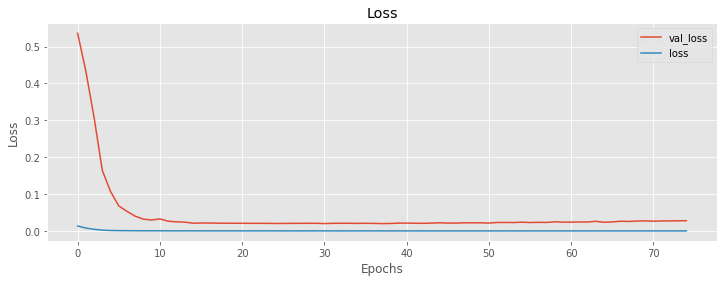

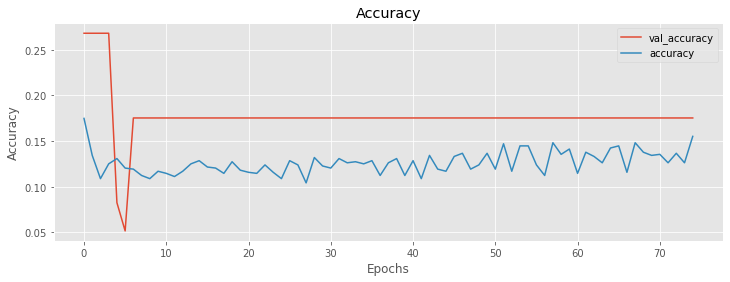

In [9]:
visualize_training_results(res)

Predicted Prices:
 [[41188.36150871813], [42473.37765971422], [44313.40572528422], [44614.43840009749], [44881.81884362101], [45444.669401662344], [46854.6579803437], [48043.95638404488], [48675.08943724513], [48161.95313818574]]

Actual Prices:
 [[63233.03], [61416.41], [60056.07], [56246.82], [55680.11], [56496.06], [53803.25], [51717.61], [51178.03], [49350.32]]


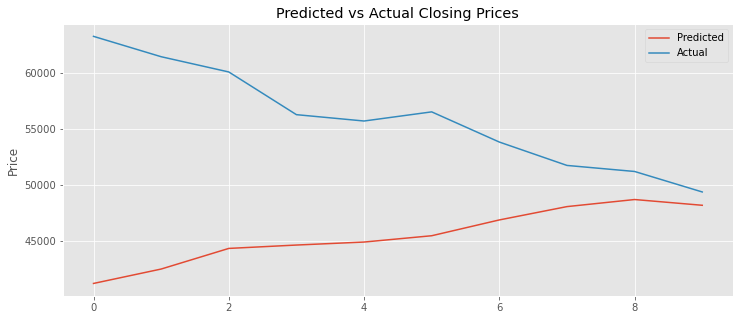

In [10]:
plt.figure(figsize=(12,5))

# Getting predictions by predicting from the last available X variable
yhat = model.predict(X[-1].reshape(1, n_per_in, n_features)).tolist()[0]

# Transforming values back to their normal prices
yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

# Getting the actual values from the last available y variable which correspond to its respective X variable
actual = scaler.inverse_transform(y[-1].reshape(-1,1))

# Printing and plotting those predictions
print("Predicted Prices:\n", yhat)
plt.plot(yhat, label='Predicted')

# Printing and plotting the actual values
print("\nActual Prices:\n", actual.tolist())
plt.plot(actual.tolist(), label='Actual')

plt.title(f"Predicted vs Actual Closing Prices")
plt.ylabel("Price")
plt.legend()
plt.savefig("BTC_validation.png")
plt.show()

                   close
2021-04-24  41232.074531
2021-04-25  42520.452669
2021-04-26  44362.598607
2021-04-27  44660.143445
2021-04-28  44930.109202
2021-04-29  45499.000550
2021-04-30  46901.693437
2021-05-01  48083.192750
2021-05-02  48727.558009
2021-05-03  48206.863531


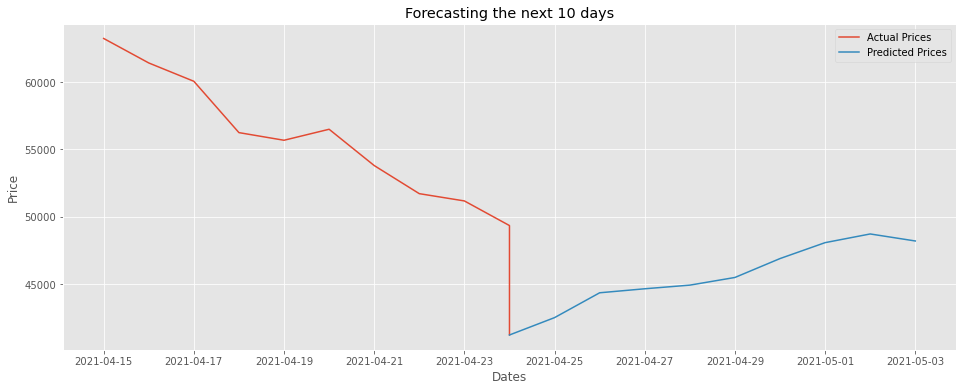

In [11]:
# Predicting off of y because it contains the most recent dates
yhat = model.predict(np.array(df.tail(n_per_in)).reshape(1, n_per_in, n_features)).tolist()[0]

# Transforming the predicted values back to their original prices
yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

# Creating a DF of the predicted prices
preds = pd.DataFrame(yhat, index=pd.date_range(start=df.index[-1], periods=len(yhat), freq="D"), columns=df.columns)

# Printing the predicted prices
print(preds)

# Number of periods back to visualize the actual values
pers = 10

# Transforming the actual values to their original price
actual = pd.DataFrame(scaler.inverse_transform(df[["close"]].tail(pers)), index=df.close.tail(pers).index, columns=df.columns).append(preds.head(1))

# Plotting
plt.figure(figsize=(16,6))
plt.plot(actual, label="Actual Prices")
plt.plot(preds, label="Predicted Prices")
plt.ylabel("Price")
plt.xlabel("Dates")
plt.title(f"Forecasting the next {len(yhat)} days")
plt.legend()
plt.savefig("btc_predictions.png")
plt.show()